### ECG PRE PROCESSING

#### **LOADING IMAGE FILE**

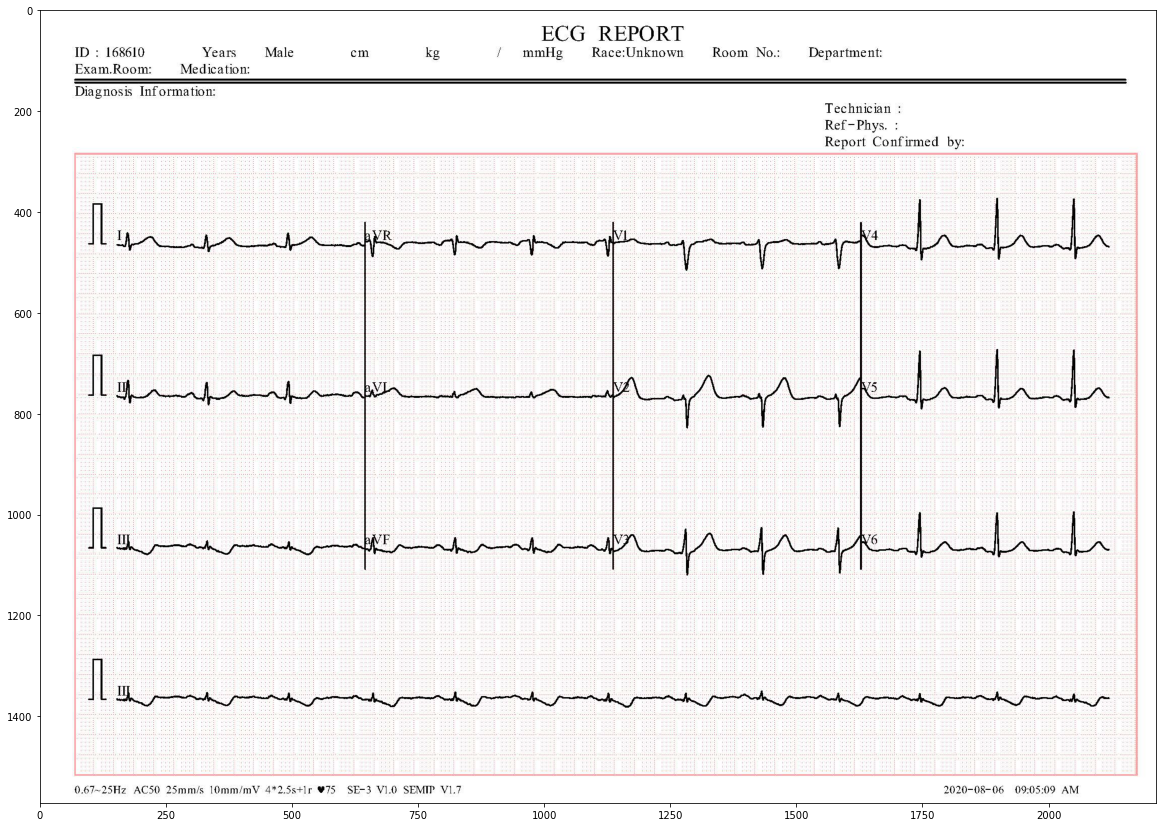

In [1]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('./Train_set/Normal/Normal(7).jpg')

ax0.imshow(image)
plt.show()

### TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM THRESHOLDING, BINARIZATION, GAUSSIAN FILTERING

0.5652904256819438


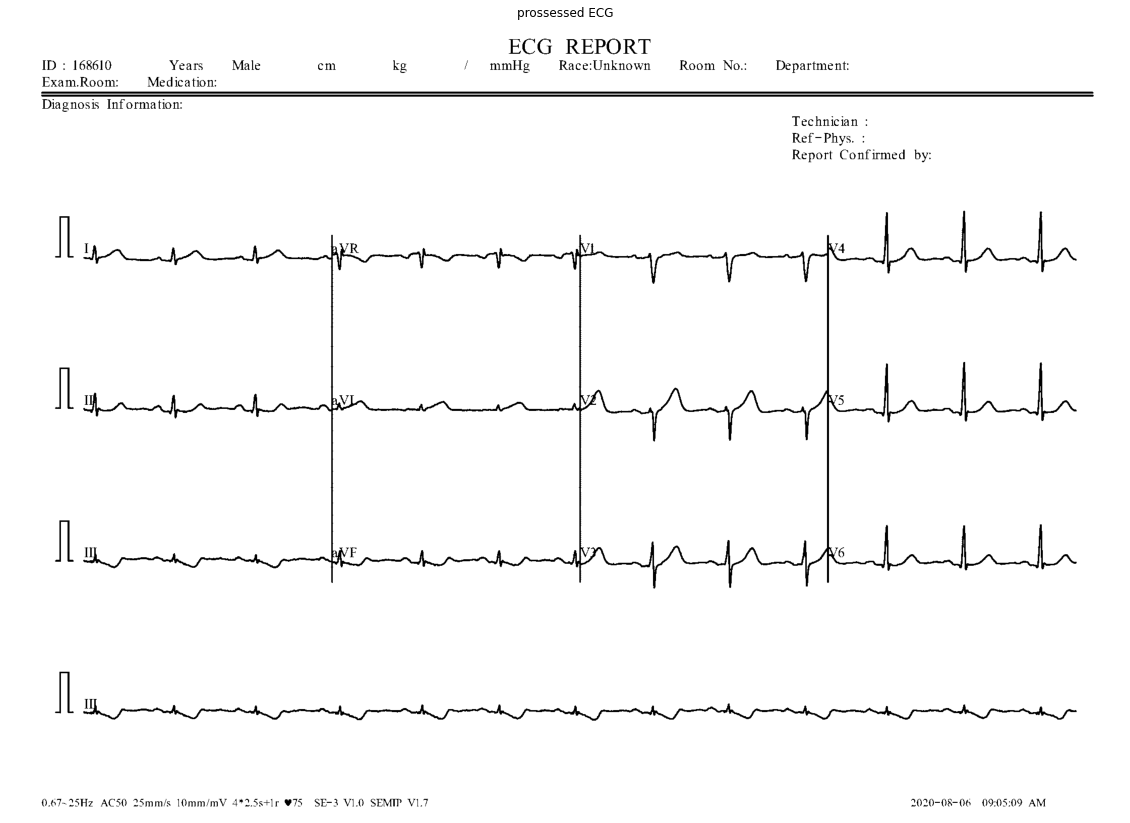

In [2]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
import numpy

fig1 , ax1 = plt.subplots()

fig1.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(image)

#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)

#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
binary_global = numpy.invert(binary_global)
ax1.imshow(binary_global,cmap='gray')
ax1.set_title("prossessed ECG")
ax1.axis('off')
image = binary_global

### Extracting 12 leads from the ECG

In [3]:
#dividing the ECG leads from 1-13 from the above image
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

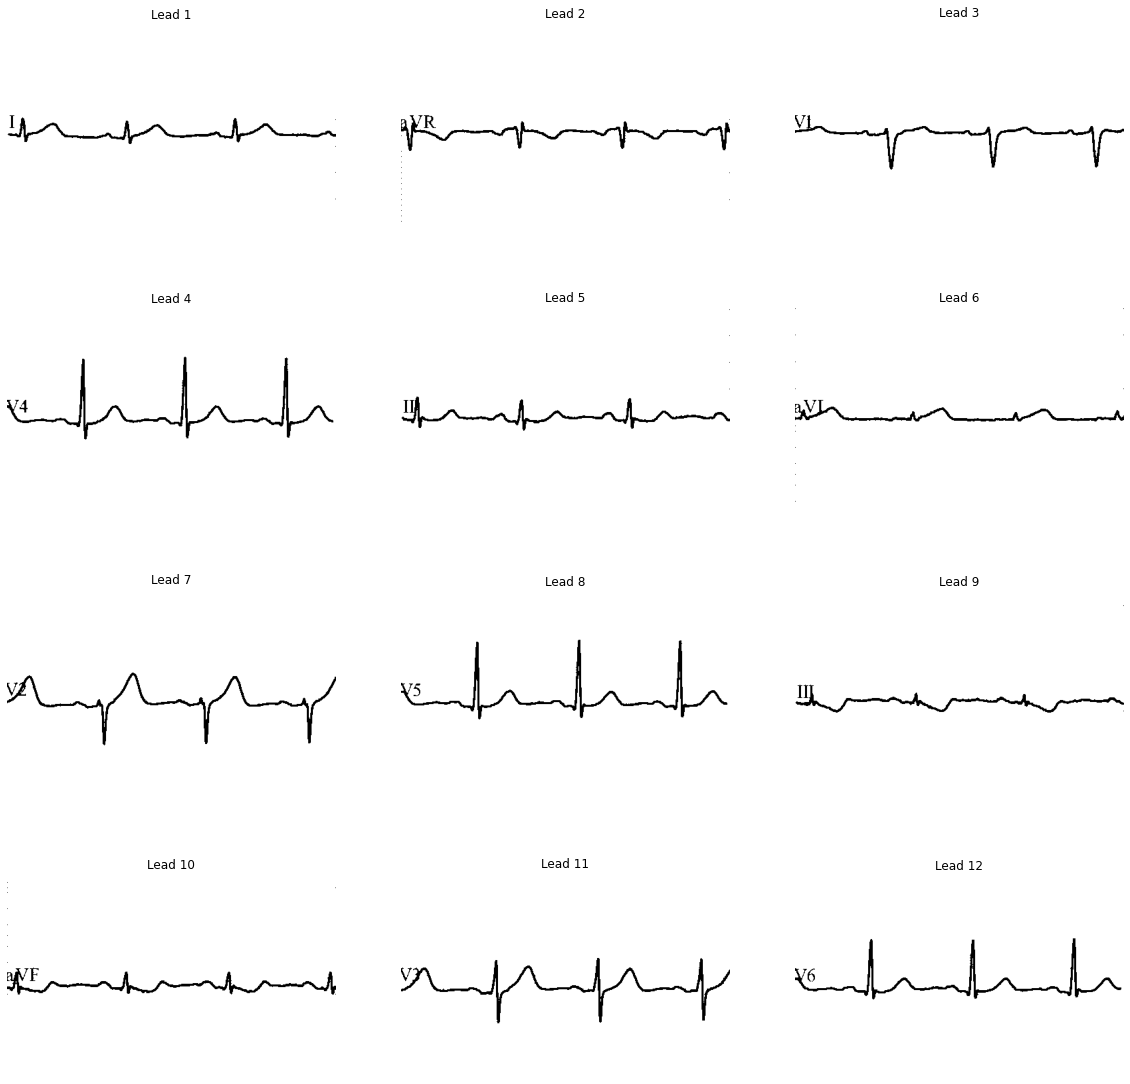

In [4]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

x_counter=0
y_counter=0

for x,y in enumerate(Leads[:len(Leads)-1]):
    if (x+1)%3==0:
        ax2[x_counter][y_counter].imshow(y, cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("Lead {}".format(x+1))
        x_counter+=1
        y_counter=0
    else:
        ax2[x_counter][y_counter].imshow(y, cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("Lead {}".format(x+1))
        y_counter+=1

image = plt.gcf()
#plot the image
plt.show()

## Preprocessing all the images in the data set

In [ ]:
#importind libraries
import pandas as pd
import numpy as np
import os
from natsort import natsorted
#import joblib

from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize

from skimage.segmentation import slic
from skimage.color import label2rgb
import numpy

### Creating array list and storing image names

In [ ]:
#creating list to store file_names
NORMAL_DATA=[]
HB_DATA=[]
MI_DATA=[]
PMI_DATA=[]

normal = './Train_set/Normal'
hb = './Train_set/HB'
mi = './Train_set/MI'
pmi = './Train_set/PMI'

Types_ECG = {'normal':normal,'Abnormal_hear_beat':hb,'MI':mi,'History_MI':pmi}

for types,folder in Types_ECG.items():
    for files in os.listdir(folder):
        if types=='normal':
            NORMAL_DATA.append(files)
        elif types=='Abnormal_hear_beat':
            HB_DATA.append(files)
        elif types=='MI':
            MI_DATA.append(files)
        elif types=='History_MI':  
            PMI_DATA.append(files)

In [ ]:
#Sorting file names useing natsort
NORMAL_DATA = natsorted(NORMAL_DATA)
HB_DATA = natsorted(HB_DATA)
MI_DATA = natsorted(MI_DATA)
PMI_DATA = natsorted(PMI_DATA)

### Normal data List

In [ ]:
NORMAL_DATA

### Abnormal heart beat data List

In [ ]:
HB_DATA

### Myocardial infarction data List

In [ ]:
MI_DATA

### History in myocardial infarction data List

In [ ]:
PMI_DATA

### Preprocessing normal data

In [ ]:
def process(image, loc):
    fig0 , ax0 = plt.subplots()
    fig0.set_size_inches(20, 20)
    ax0.imshow(image)
    plt.show()
    
    fig1 , ax1 = plt.subplots()
    fig1.set_size_inches(20, 20)
    grayscale = color.rgb2gray(image)
    blurred_image = gaussian(grayscale, sigma=0.7)
    global_thresh = threshold_otsu(blurred_image)
    binary_global = blurred_image < global_thresh
    binary_global = numpy.invert(binary_global)
    ax1.imshow(binary_global,cmap='gray')
    ax1.set_title("prossessed ECG")
    ax1.axis('off')
    image = binary_global
    
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1625]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1625]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1625]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]
    
    fig2 , ax2 = plt.subplots(4,3)
    fig2.set_size_inches(20, 20)
    x_counter=0
    y_counter=0
    for x,y in enumerate(Leads[:len(Leads)-1]):
        if (x+1)%3==0:
            ax2[x_counter][y_counter].imshow(y, cmap="gray")
            ax2[x_counter][y_counter].axis('off')
            ax2[x_counter][y_counter].set_title("Lead {}".format(x+1))
            x_counter+=1
            y_counter=0
        else:
            ax2[x_counter][y_counter].imshow(y, cmap="gray")
            ax2[x_counter][y_counter].axis('off')
            ax2[x_counter][y_counter].set_title("Lead {}".format(x+1))
            y_counter+=1
    fig2.savefig(loc)
    plt.show()

In [ ]:
for d in NORMAL_DATA:
    image=imread(r"./Train_set/Normal/{}".format(d))
    loc = "Preprocessed_{}".format(d)
    process(image, loc)

In [ ]:
for d in HB_DATA:
    image=imread(r"./Train_set/HB/{}".format(d))
    loc = "Preprocessed_{}".format(d)
    process(image, loc)

In [ ]:
for d in MI_DATA:
    image=imread(r"./Train_set/MI/{}".format(d))
    loc = "Preprocessed_{}".format(d)
    process(image, loc)

In [ ]:
for d in PMI_DATA:
    image=imread(r"./Train_set/PMI/{}".format(d))
    loc = "Preprocessed_{}".format(d)
    process(image, loc)